# CAPSTON Loan Prediction Project :

## Loan Approval Prediction Project

Developed a machine learning model to predict loan approval based on diverse parameters, including gender, marital status, income details, credit history, and property area. Implemented multiple algorithms, such as Logistic Regression, KNN, SVM, DT, RF, AB, GB, XGB, and ANN, with XGBoost achieving the highest accuracy. The project enhances the loan approval process, providing valuable insights for informed decision-making by bank managers.


## Business Problem Understanding:

In the context of the Loan Approval Prediction Project, the primary business problem is to enhance the efficiency and accuracy of the loan approval process for banking institutions. Traditional approaches to evaluating loan applications involve a manual and time-consuming assessment of various parameters. The goal of this project is to leverage machine learning algorithms to automate and streamline the decision-making process.

By utilizing a diverse set of features such as gender, marital status, income details, credit history, and property area, the model aims to provide a robust framework for predicting loan approval. This proactive approach not only expedites the application review process but also ensures a fair and consistent evaluation, ultimately empowering bank managers to make informed decisions.

The implementation of multiple classification algorithms allows for a comprehensive evaluation of the data, leading to the identification of the most accurate and reliable predictive model. The overarching objective is to improve the overall efficiency, objectivity, and effectiveness of loan approval decisions, contributing to a more streamlined and customer-friendly banking experience.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("LoanData.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data UnderStanding :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df['Loan_ID'].nunique()

614

In [7]:
df.drop('Loan_ID',inplace=True,axis=1)

In [8]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [9]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [10]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [11]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [12]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [13]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

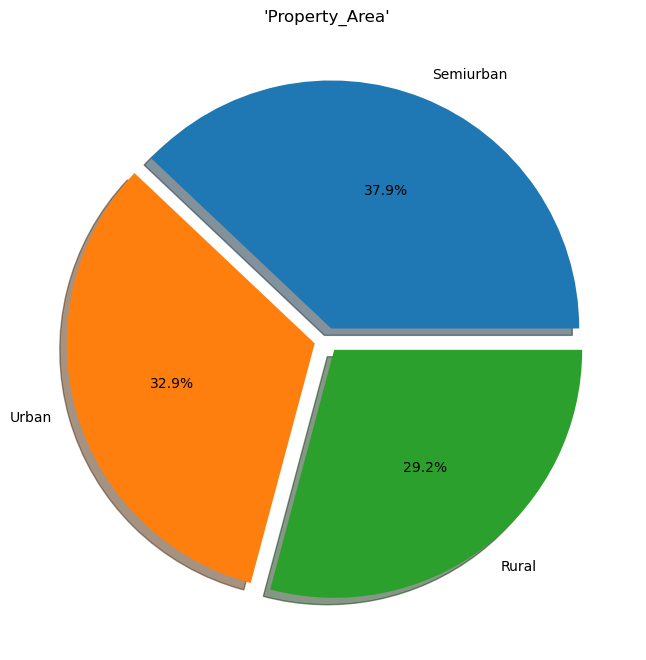

In [14]:
plt.figure(figsize=(8,10))
plt.pie(x=df['Property_Area'].value_counts(),labels=df['Property_Area'].value_counts().index
        ,autopct="%0.1f%%",explode=[0.05,0.05,0.05],shadow=True)
plt.title("'Property_Area'")
plt.show()

In [15]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [16]:
len(df['Loan_Amount_Term'].value_counts())

10

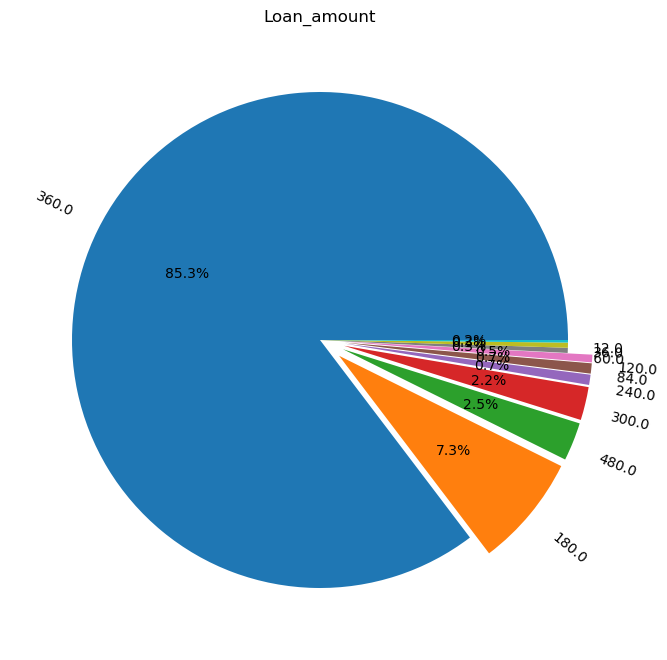

In [17]:
plt.figure(figsize=(8,10))
plt.pie(x=df['Loan_Amount_Term'].value_counts(),labels=df['Loan_Amount_Term'].value_counts().index
        ,autopct="%0.1f%%",explode=[0,0.1,0.1,0.1,0.1,0.1,0.1,0,0,0],rotatelabels=True)
plt.title("Loan_amount")
plt.show()

In [18]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [19]:
df.isnull().sum()/len(df)*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Data Cleaning :

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [21]:
# Dependers should be in counts ,but not as object :
df["Dependents"] = df["Dependents"].replace("3+",3)
df["Dependents"].replace(np.nan,0,inplace=True)

# converting objects to count data :
df["Dependents"] = df["Dependents"].astype("int")

df["Dependents"].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [22]:
df.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
# Replacing the the missing values in discrete columns by mode :
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)


# Replacing the the missing values with zero (becouse not given) : 
df["Credit_History"].replace(np.nan,0,inplace=True)
df["Dependents"].replace(np.nan,0,inplace=True)


# Dropping the columns which are havind < 5% missing Data :
df.dropna(inplace=True)



In [24]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
# Grouping of columns :
continous = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
dis_cat = df[['Gender', 'Married','Education', 'Self_Employed','Property_Area','Loan_Status']]
dis_count = df[['Dependents','Loan_Amount_Term']]

In [27]:
# Descriptive analytics :
print(continous.describe())
print("==========================================================================")
print(dis_cat.describe())
print("==========================================================================")
print(dis_count.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       578.000000         578.000000  578.000000
mean       5435.138408        1640.482561  147.143599
std        6229.382997        2993.270767   86.342523
min         150.000000           0.000000    9.000000
25%        2890.250000           0.000000  100.000000
50%        3812.500000        1211.500000  128.000000
75%        5795.000000        2281.000000  168.000000
max       81000.000000       41667.000000  700.000000
       Gender Married Education Self_Employed Property_Area Loan_Status
count     578     578       578           578           578         578
unique      2       2         2             2             3           2
top      Male     Yes  Graduate            No     Semiurban           Y
freq      472     377       457           501           225         403
       Dependents  Loan_Amount_Term
count  578.000000        578.000000
mean     0.756055        342.145329
std      1.011720         65.442101
min      0

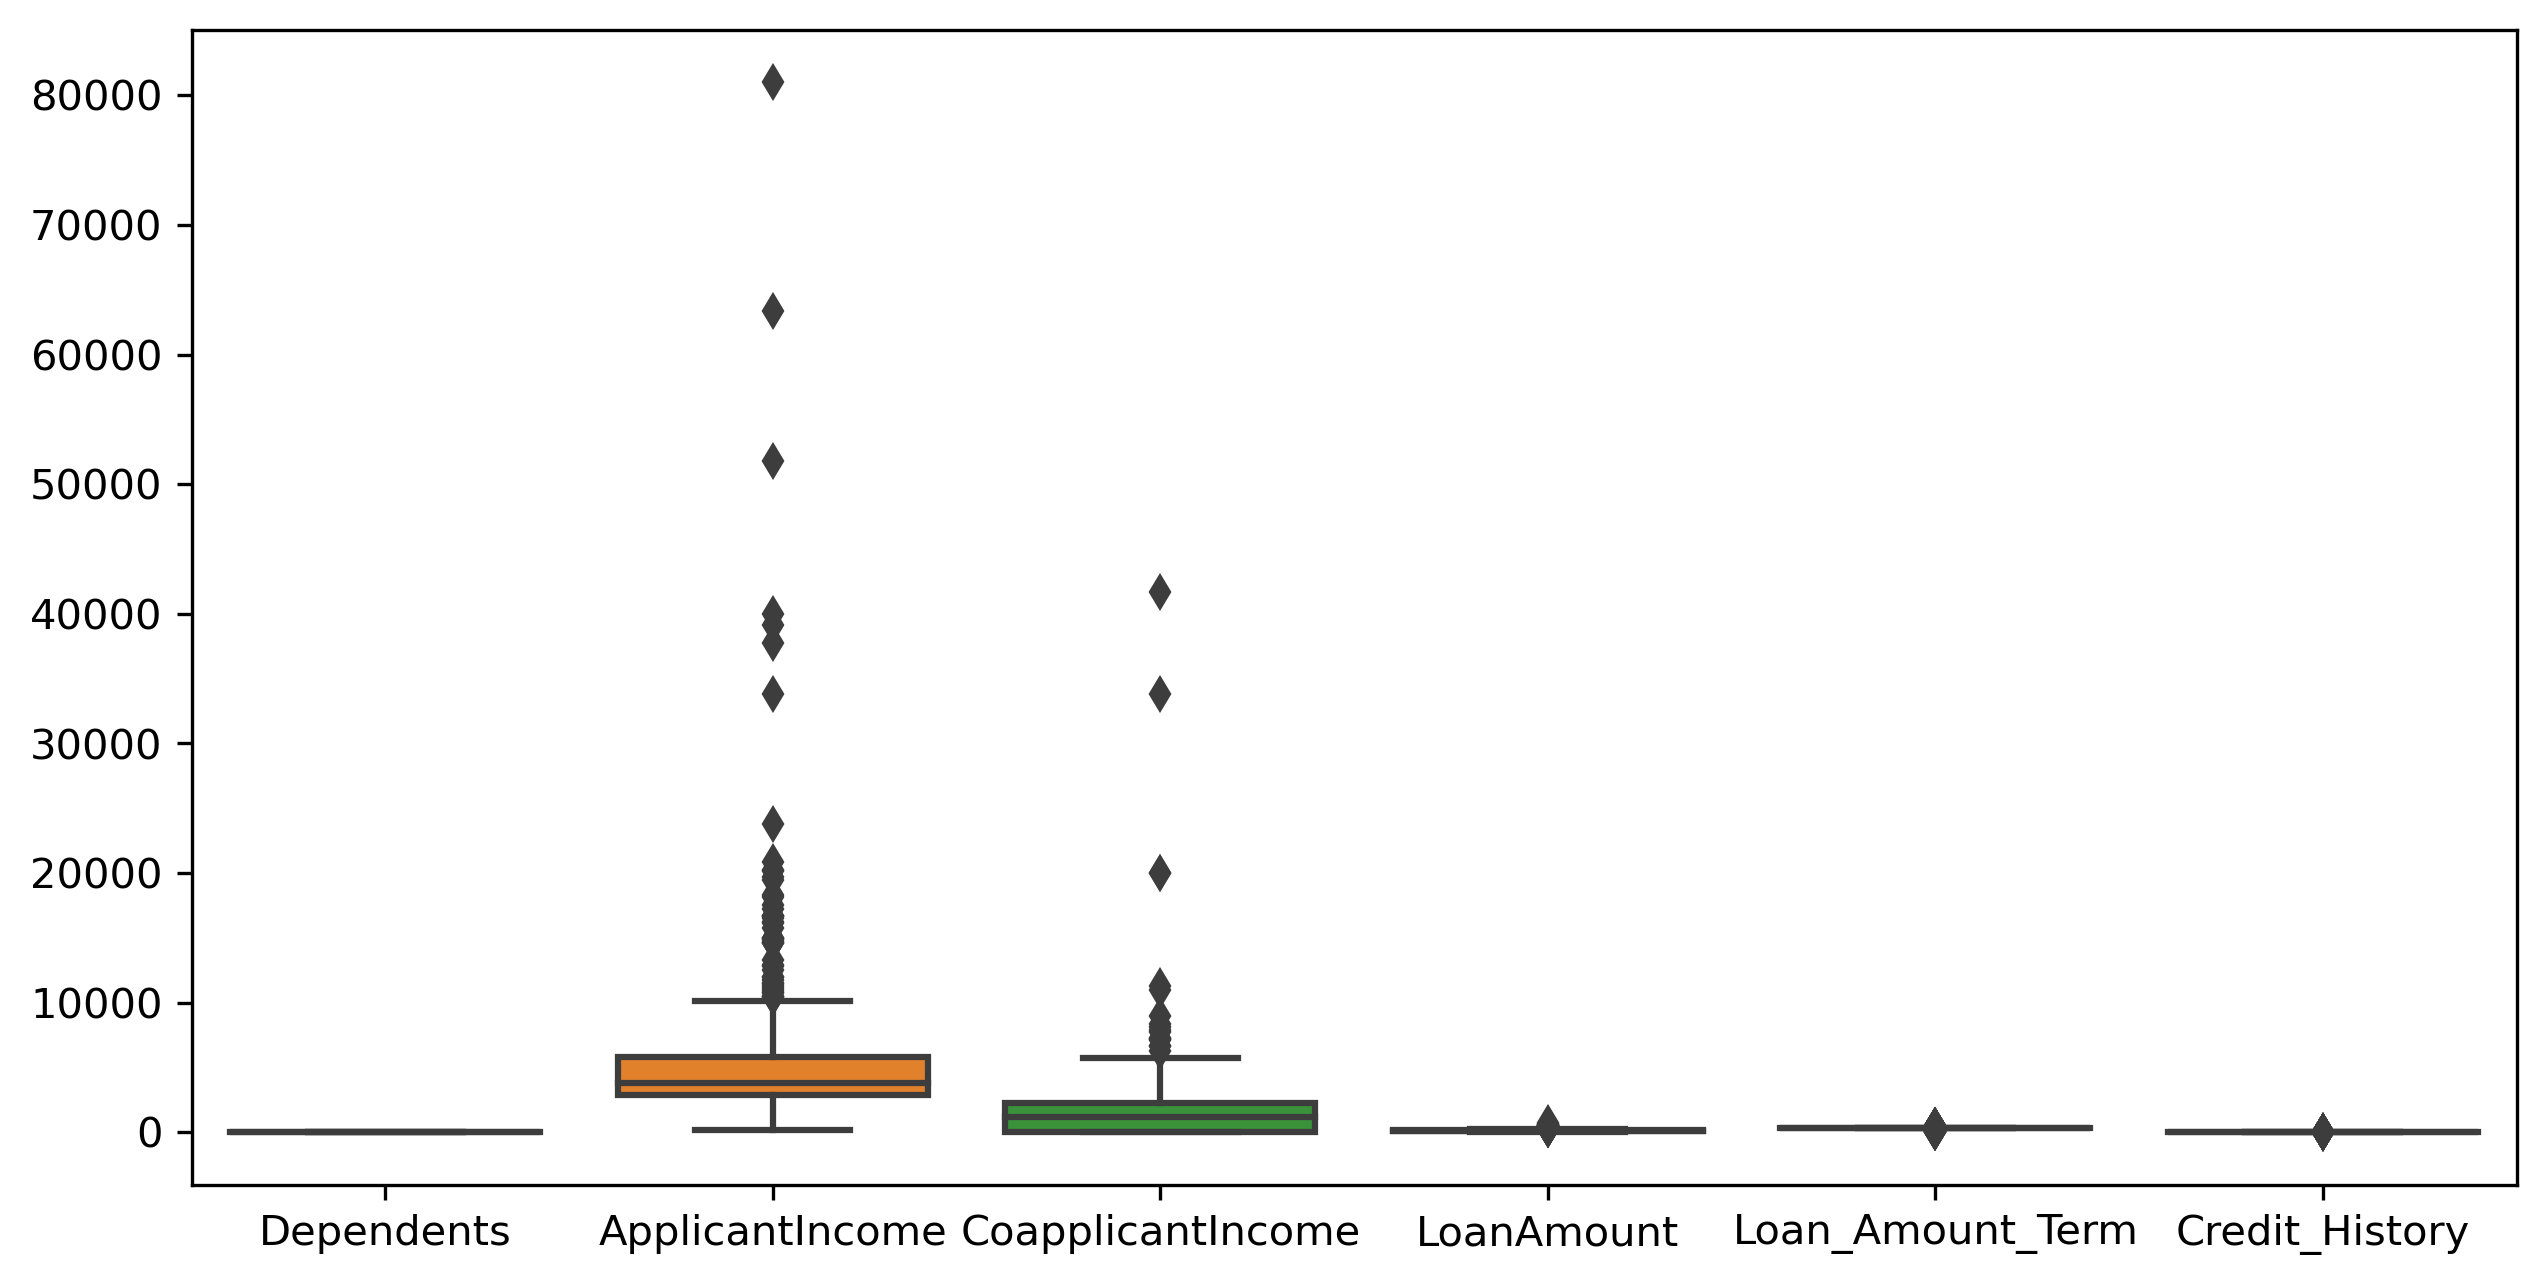

In [28]:
# Check for outlaiyers :
plt.figure(figsize=(10,5),dpi=300)
sns.boxplot(df)
plt.show()

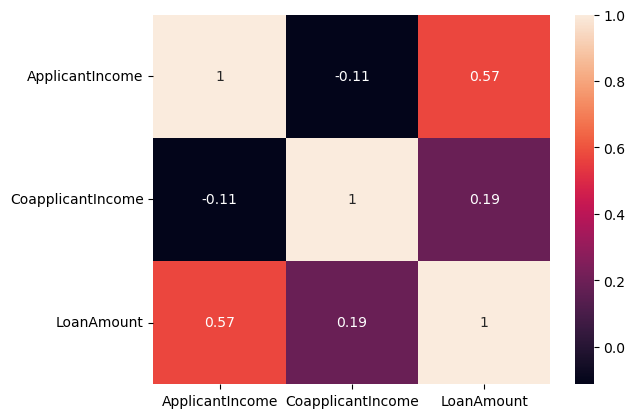

In [29]:
sns.heatmap(continous.corr(),annot=True)
plt.show()

# Cleaned Data Set :

In [30]:
df.to_csv("CAPSTON CLEANED DATASET.csv")

# Feuture Engineering :

In [31]:
continous.skew()

ApplicantIncome      6.511168
CoapplicantIncome    7.418367
LoanAmount           2.649577
dtype: float64

In [32]:
# AFTER CONVERTING SKEW TO NORMAL DATA :

print("===========SKEWNESS============")

df["ApplicantIncome"] = np.log(df['ApplicantIncome']+0.001)
print("APPLICANTINCOME :", df["ApplicantIncome"].skew())

df["CoapplicantIncome"] = np.log(df["CoapplicantIncome"]+0.001)
print("COAPPLICANTINCOME :", df["CoapplicantIncome"].skew())

df["LoanAmount"] = np.log(df["LoanAmount"]+0.001)
print("LOAN AMOUNT :",df["LoanAmount"].skew())

===========SKEWNESS============
APPLICANTINCOME : 0.4661022193844673
COAPPLICANTINCOME : -0.2152493952340374
LOAN AMOUNT : -0.20785187415099493


In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852038,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,-6.907755,4.189670,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765570,4.787500,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,-6.907755,4.948767,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,8.597298,8.341887,5.587252,360.0,1.0,Urban,Y


In [ ]:
# Best Random state number is = 34

# 1. LOGISTIC REGRESSION :

In [35]:
print("============== Logistic Regression =============")
# Step 1 : dividing the Data and Creating 2D and 1D Datas :  
X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : Appying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.8,random_state=34)

# Appying standared scaller :
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 3 : Creating the model :
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

# Step 4 : predicting the values :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : No rmse in classification projects

# Step 6 : Accuracy score for train,test data:
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Test Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : Check for Cross_validation_score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross Validation Score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
confusion_matarix = confusion_matrix(y_test,y_test_pred)
print(confusion_matarix)

print('=================== Classification Report ===============')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("============== Area under the curve ===============")
from sklearn.metrics import roc_auc_score
print("Area under the curve:",roc_auc_score(y_test,y_test_pred))

============== Logistic Regression =============
Train Accuracy: 0.7597402597402597
Test Accuracy: 0.7586206896551724
Cross Validation Score: 0.7467274427302477
================= CONFUSION MATRIX ==============
[[14 25]
 [ 3 74]]
=================== Classification Report ===============
              precision    recall  f1-score   support

           0       0.82      0.36      0.50        39
           1       0.75      0.96      0.84        77

    accuracy                           0.76       116
   macro avg       0.79      0.66      0.67       116
weighted avg       0.77      0.76      0.73       116

============== Area under the curve ===============
Area under the curve: 0.66000666000666


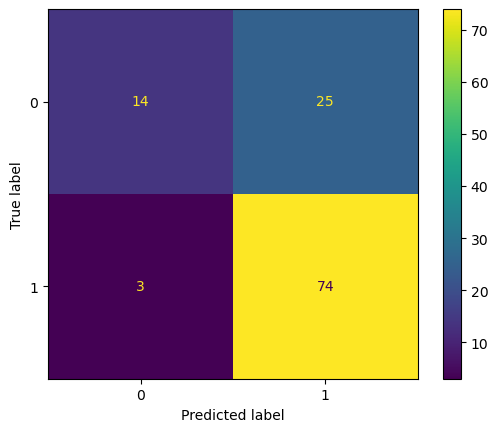

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matarix).plot()
display
plt.show()

# 2. K~NN Classification :

In [37]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
print("================ K~NN Classiication ====================")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : Applying train Test split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=13)

# Step 3 : Applying the model :
from sklearn.neighbors import  KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

# Step 4 : Prediction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : No rmse in Classification:

# Step 6 : Accuracy Score :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Test ACcuracy:",ac_s(y_test,y_test_pred))

# Step 7 : Applying Cross_validation_score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross Validation Score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
confusion_matarix = confusion_matrix(y_test,y_test_pred)
print(confusion_matarix)

print('=================== Classification Report ===============')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("============== Area under the curve ===============")
from sklearn.metrics import roc_auc_score
print("Area under the curve:",roc_auc_score(y_test,y_test_pred))

================ K~NN Classiication ====================
Train Accuracy: 0.7705627705627706
Test ACcuracy: 0.75
Cross Validation Score: 0.7056334735857878
================= CONFUSION MATRIX ==============
[[10 27]
 [ 2 77]]
=================== Classification Report ===============
              precision    recall  f1-score   support

           0       0.83      0.27      0.41        37
           1       0.74      0.97      0.84        79

    accuracy                           0.75       116
   macro avg       0.79      0.62      0.62       116
weighted avg       0.77      0.75      0.70       116

============== Area under the curve ===============
Area under the curve: 0.6224769072870339


# Appying Hypertuning :

In [39]:
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors":list(range(30,50))}
model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'n_neighbors': 38}

In [40]:
print("================ FINAL K~NN Classiication ====================")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : Applying train Test split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

# Step 3 : Applying the model :
from sklearn.neighbors import  KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=38)
model.fit(X_train,y_train)

# Step 4 : Prediction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : No rmse in Classification:

# Step 6 : Accuracy Score :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Test ACcuracy:",ac_s(y_test,y_test_pred))

# Step 7 : Applying Cross_validation_score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross Validation Score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
confusion_matarix = confusion_matrix(y_test,y_test_pred)
print(confusion_matarix)

print('=================== Classification Report ===============')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("============== Area under the curve ===============")
from sklearn.metrics import roc_auc_score
print("Area under the curve:",roc_auc_score(y_test,y_test_pred))

================ FINAL K~NN Classiication ====================
Train Accuracy: 0.696969696969697
Test ACcuracy: 0.7155172413793104
Cross Validation Score: 0.6926601215521272
================= CONFUSION MATRIX ==============
[[ 1 33]
 [ 0 82]]
=================== Classification Report ===============
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        34
           1       0.71      1.00      0.83        82

    accuracy                           0.72       116
   macro avg       0.86      0.51      0.44       116
weighted avg       0.80      0.72      0.61       116

============== Area under the curve ===============
Area under the curve: 0.5147058823529411


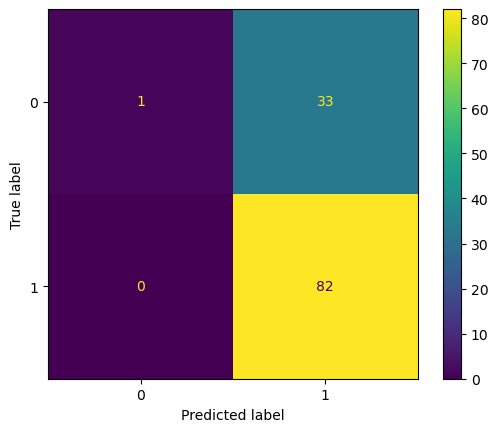

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matarix).plot()
plt.show()

# 3.SUPPORT VECTOR MECHINES (SVM) ALGORITHEM :

In [42]:
print("================ SVM CLASSIFICATION ====================")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : applying train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=5)

# Step 3 : model Creation :
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

# Step 4 : Prediction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : no rmse in classification 

# Step 6 : checking accuracy score :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Tesy Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : checking Cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross validation Score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
confusion_matarix = confusion_matrix(y_test,y_test_pred)
print(confusion_matarix)

print('=================== Classification Report ===============')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("============== Area under the curve ===============")
from sklearn.metrics import roc_auc_score
print("Area under the curve:",roc_auc_score(y_test,y_test_pred))

================ SVM CLASSIFICATION ====================
Train Accuracy: 0.696969696969697
Tesy Accuracy: 0.6982758620689655
Cross validation Score: 0.6969611968209444
================= CONFUSION MATRIX ==============
[[ 0 35]
 [ 0 81]]
=================== Classification Report ===============
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.70      1.00      0.82        81

    accuracy                           0.70       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.49      0.70      0.57       116

============== Area under the curve ===============
Area under the curve: 0.5


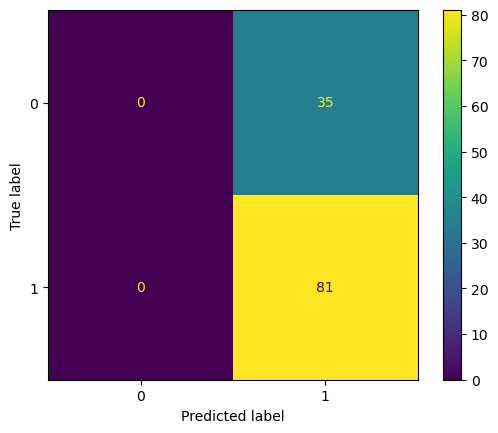

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matarix).plot()
display
plt.show()

In [44]:
# HYPER TUNNING :
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
estimater = SVC()
param_grid = {"C":list(range(1,5)),"kernel":['linear', 'poly', 'rbf', 'sigmoid']}
model_hp = GridSearchCV(estimater,param_grid,cv=5,scoring="r2",error_score='raise')
model_hp.fit(X_train,y_train)
model_hp.best_params_


{'C': 1, 'kernel': 'linear'}

In [45]:
print("================ SVM CLASSIFICATION ====================")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : applying train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=5)

# Step 3 : model Creation :
from sklearn.svm import SVC
model = SVC(C=1.0,kernel='linear')
model.fit(X_train,y_train)

# Step 4 : Prediction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : no rmse in classification 

# Step 6 : checking accuracy score :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Tesy Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : checking Cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross validation Score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
confusion_matarix = confusion_matrix(y_test,y_test_pred)
print(confusion_matarix)

print('=================== Classification Report ===============')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("============== Area under the curve ===============")
from sklearn.metrics import roc_auc_score
print("Area under the curve:",roc_auc_score(y_test,y_test_pred))

================ SVM CLASSIFICATION ====================
Train Accuracy: 0.7640692640692641
Tesy Accuracy: 0.7758620689655172
Cross validation Score: 0.7642356241234222
================= CONFUSION MATRIX ==============
[[16 19]
 [ 7 74]]
=================== Classification Report ===============
              precision    recall  f1-score   support

           0       0.70      0.46      0.55        35
           1       0.80      0.91      0.85        81

    accuracy                           0.78       116
   macro avg       0.75      0.69      0.70       116
weighted avg       0.77      0.78      0.76       116

============== Area under the curve ===============
Area under the curve: 0.6853615520282187


# 4. DECISION TREE :

In [46]:
print("================ FINAL DESCISION TREE CLASSIFICATION ====================")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2: Applying Train test split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=1)

# Step 3 : model Creation :
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

# Step 4 : Prediiction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : no rmse in classification :

# Step 6 : ACCURACY SCORE :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Tesy Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : checking Cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross validation Score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
confusion_matarix = confusion_matrix(y_test,y_test_pred)
print(confusion_matarix)

print('=================== Classification Report ===============')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("============== Area under the curve ===============")
from sklearn.metrics import roc_auc_score
print("Area under the curve:",roc_auc_score(y_test,y_test_pred))




================ FINAL DESCISION TREE CLASSIFICATION ====================
Train Accuracy: 1.0
Tesy Accuracy: 0.6120689655172413
Cross validation Score: 0.670967741935484
================= CONFUSION MATRIX ==============
[[10 26]
 [19 61]]
=================== Classification Report ===============
              precision    recall  f1-score   support

           0       0.34      0.28      0.31        36
           1       0.70      0.76      0.73        80

    accuracy                           0.61       116
   macro avg       0.52      0.52      0.52       116
weighted avg       0.59      0.61      0.60       116

============== Area under the curve ===============
Area under the curve: 0.5201388888888889


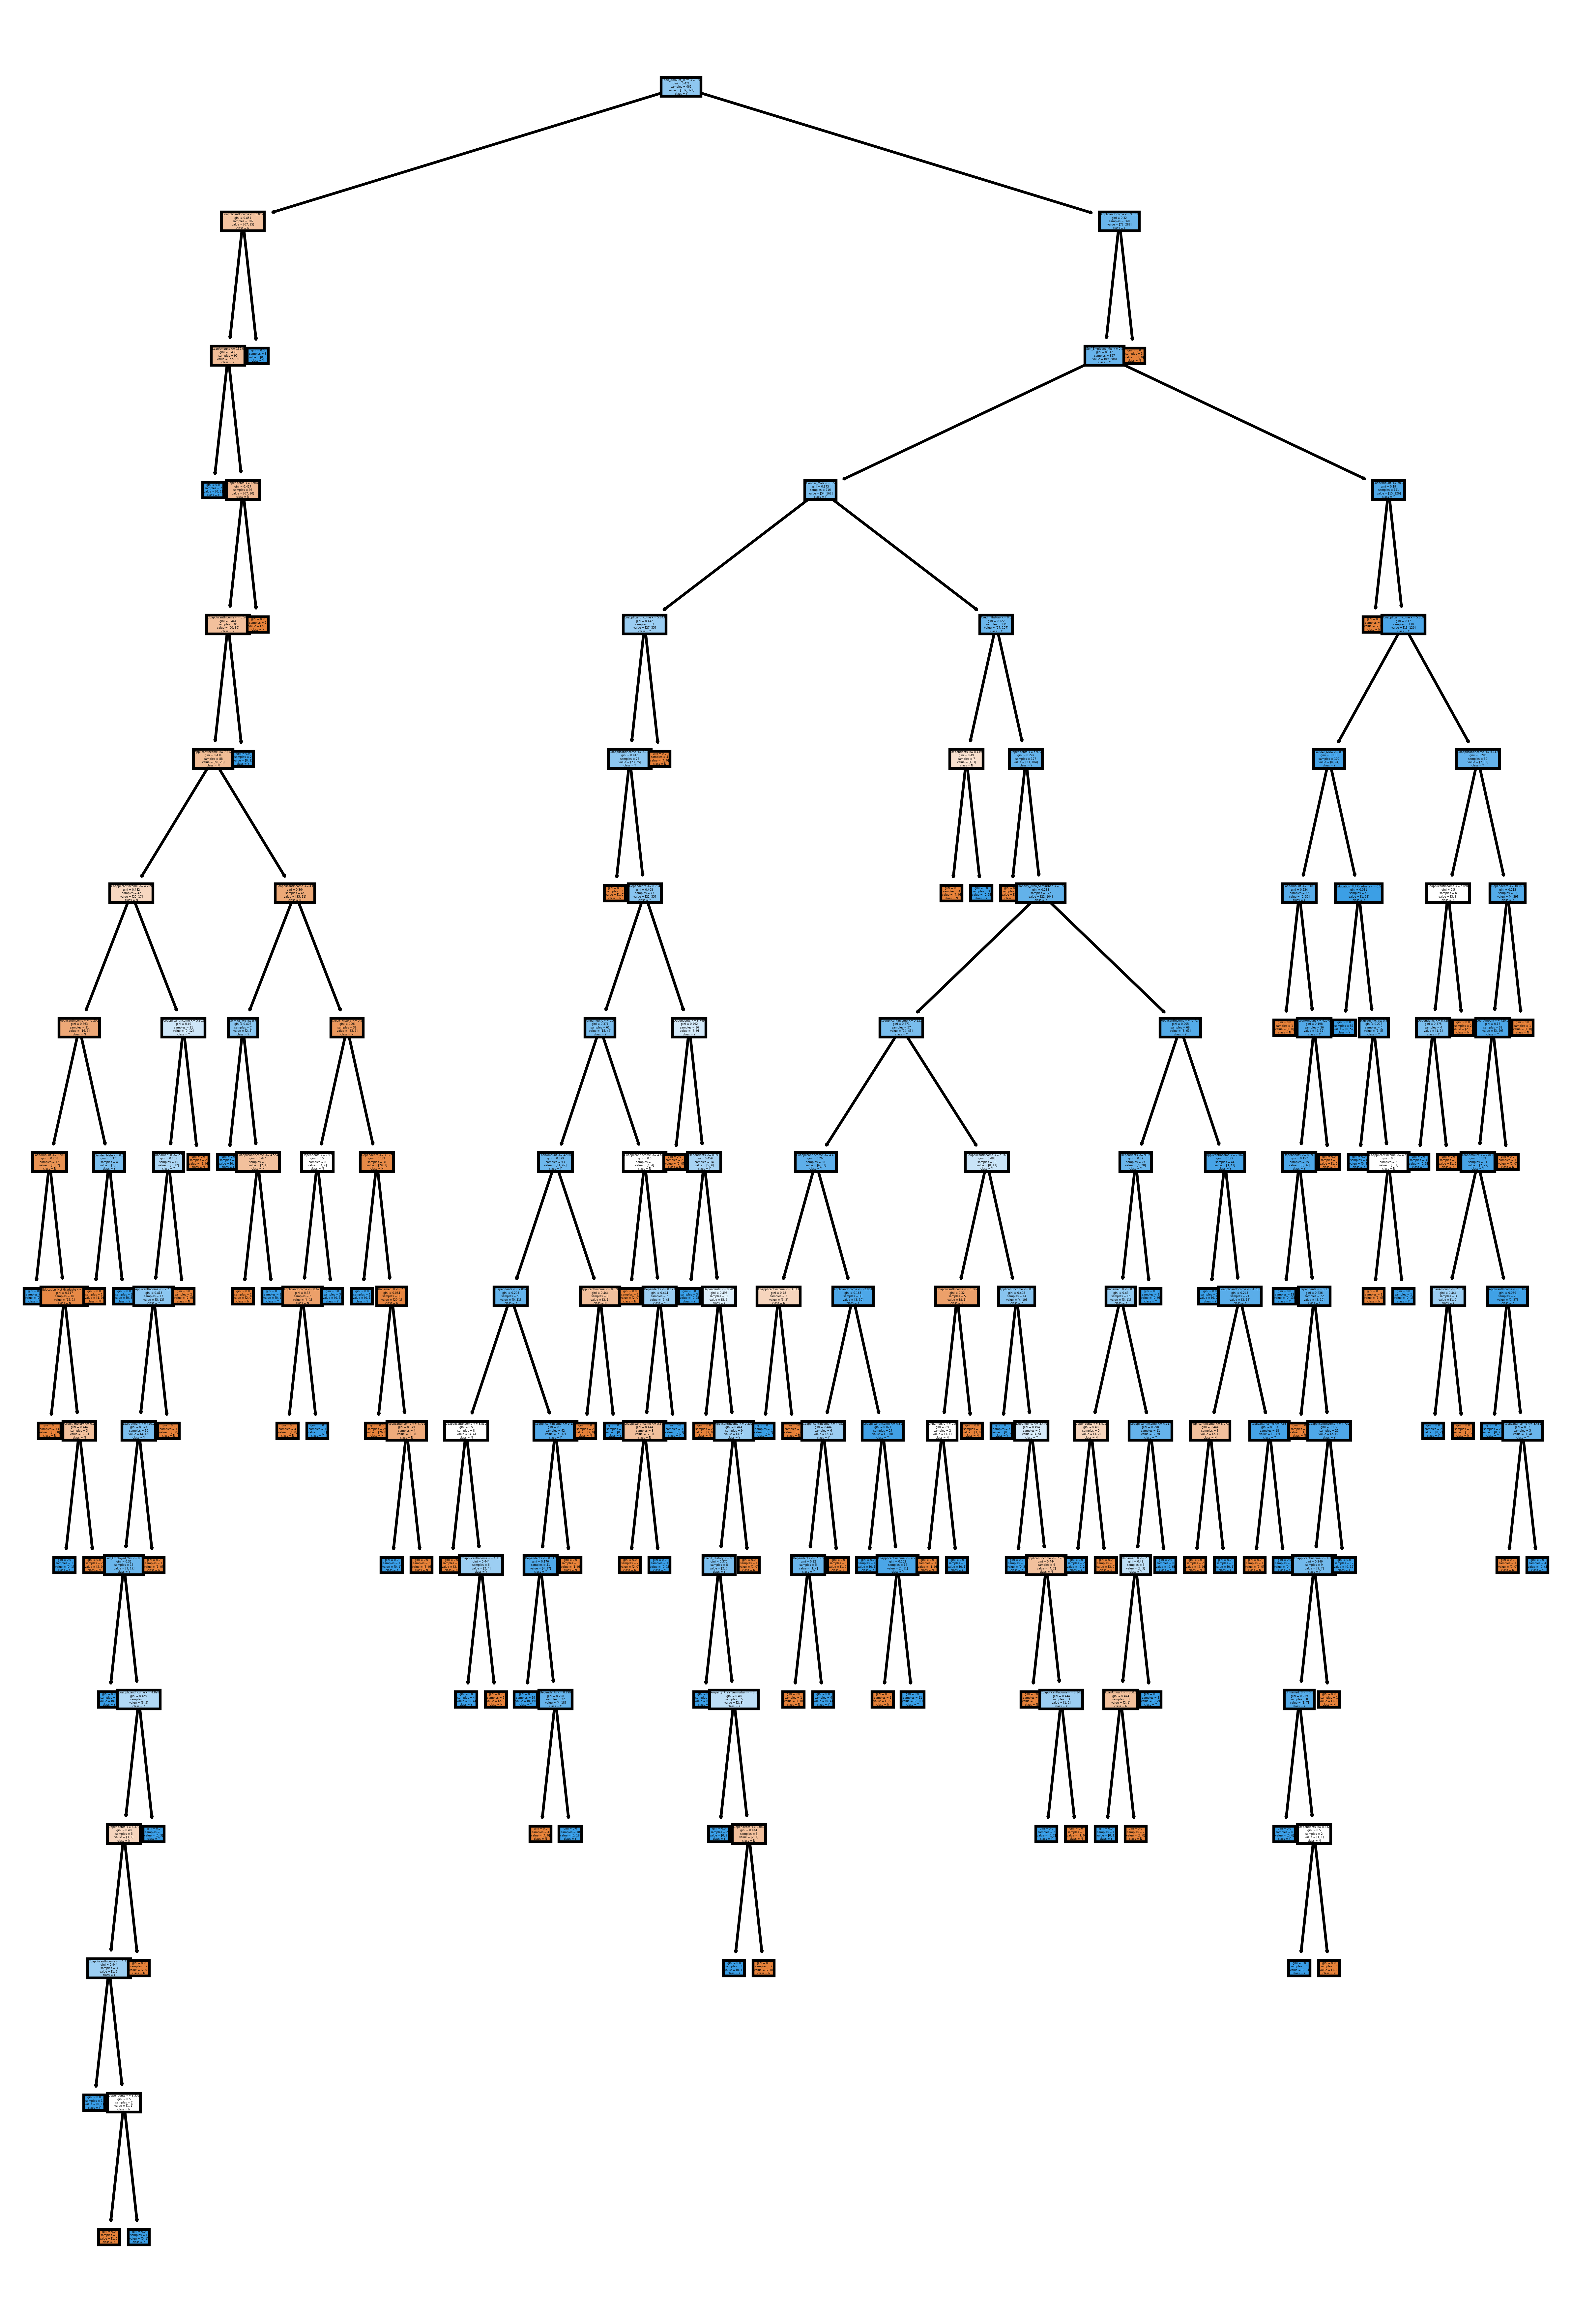

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,15),dpi=600)
plot_tree(model,filled=True,
          feature_names=['Unnamed: 0', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],class_names=["N","Y"])
plt.show()

In [48]:
# Hypertuning :
from sklearn.model_selection import GridSearchCV
estimater = DecisionTreeClassifier()
param_grid = {"max_depth":list(range(1,10)),"criterion":["gini", "entropy", "log_loss"]}
model_hp = GridSearchCV(estimater,param_grid,cv=5,scoring="accuracy")
model_hp.fit(X_train,y_train)
model_hp.best_params_


{'criterion': 'gini', 'max_depth': 1}

In [49]:
model_hp.best_estimator_.feature_importances_

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [50]:
X.columns[5]

'Credit_History'

In [51]:
X = df[["Credit_History"]]

In [52]:
print("================ FINAL DESCISION TREE CLASSIFICATION ====================")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = X
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2: Applying Train test split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=1)

# Step 3 : model Creation :
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=1)
model.fit(X_train,y_train)

# Step 4 : Prediiction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : no rmse in classification :

# Step 6 : ACCURACY SCORE :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Tesy Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : checking Cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross validation Score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
confusion_matarix = confusion_matrix(y_test,y_test_pred)
print(confusion_matarix)

print('=================== Classification Report ===============')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("============== Area under the curve ===============")
from sklearn.metrics import roc_auc_score
print("Area under the curve:",roc_auc_score(y_test,y_test_pred))




================ FINAL DESCISION TREE CLASSIFICATION ====================
Train Accuracy: 0.7683982683982684
Tesy Accuracy: 0.7586206896551724
Cross validation Score: 0.7683964469378214
================= CONFUSION MATRIX ==============
[[17 19]
 [ 9 71]]
=================== Classification Report ===============
              precision    recall  f1-score   support

           0       0.65      0.47      0.55        36
           1       0.79      0.89      0.84        80

    accuracy                           0.76       116
   macro avg       0.72      0.68      0.69       116
weighted avg       0.75      0.76      0.75       116

============== Area under the curve ===============
Area under the curve: 0.6798611111111111


# 5. Random Forest :

In [53]:
print("====================== Random Forest================= ")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2: Applying Train test split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=1)

# Step 3: Model Creation :
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

# Step 4 : Prediction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : no rmse in classification

# Step 6 : ACCURACY SCORE :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Tesy Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : checking Cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross validation Score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
confusion_matarix = confusion_matrix(y_test,y_test_pred)
print(confusion_matarix)

print('=================== Classification Report ===============')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("============== Area under the curve ===============")
from sklearn.metrics import roc_auc_score
print("Area under the curve:",roc_auc_score(y_test,y_test_pred))


====================== Random Forest================= 
Train Accuracy: 1.0
Tesy Accuracy: 0.7155172413793104
Cross validation Score: 0.7142356241234221
================= CONFUSION MATRIX ==============
[[14 22]
 [11 69]]
=================== Classification Report ===============
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        36
           1       0.76      0.86      0.81        80

    accuracy                           0.72       116
   macro avg       0.66      0.63      0.63       116
weighted avg       0.70      0.72      0.70       116

============== Area under the curve ===============
Area under the curve: 0.6256944444444444


In [54]:
from sklearn.model_selection import GridSearchCV
estimater = RandomForestClassifier()
param_grid = {"n_estimators":list(range(1,50))}
model_hp = GridSearchCV(estimater,param_grid,cv=5,scoring="accuracy",error_score='raise')
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'n_estimators': 33}

In [55]:
model_hp.best_estimator_.feature_importances_

array([0.06143004, 0.23048075, 0.11812619, 0.20953188, 0.05853576,
       0.15210874, 0.02590136, 0.02988794, 0.02752244, 0.02495573,
       0.03581971, 0.02569946])

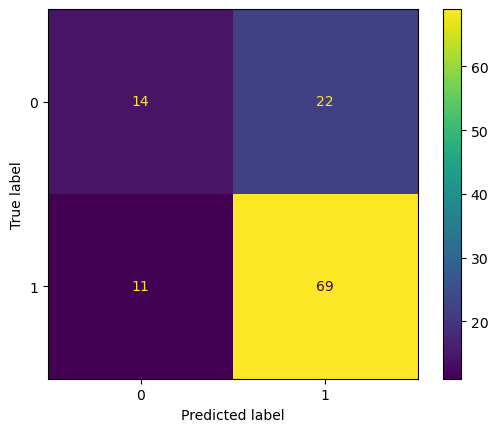

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matarix).plot()
plt.show()

In [57]:
print("====================== FINAL Random Forest ================= ")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2: Applying Train test split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=13)

# Step 3: Model Creation :
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=33)
model.fit(X_train,y_train)

# Step 4 : Prediction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : no rmse in classification

# Step 6 : ACCURACY SCORE :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Tesy Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : checking Cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross validation Score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
confusion_matarix = confusion_matrix(y_test,y_test_pred)
print(confusion_matarix)

print('=================== Classification Report ===============')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("============== Area under the curve ===============")
from sklearn.metrics import roc_auc_score
print("Area under the curve:",roc_auc_score(y_test,y_test_pred))


====================== FINAL Random Forest ================= 
Train Accuracy: 1.0
Tesy Accuracy: 0.7155172413793104
Cross validation Score: 0.733637213651239
================= CONFUSION MATRIX ==============
[[11 26]
 [ 7 72]]
=================== Classification Report ===============
              precision    recall  f1-score   support

           0       0.61      0.30      0.40        37
           1       0.73      0.91      0.81        79

    accuracy                           0.72       116
   macro avg       0.67      0.60      0.61       116
weighted avg       0.70      0.72      0.68       116

============== Area under the curve ===============
Area under the curve: 0.6043448511802942


# 6. Ada~Boost Classifier :

In [58]:
print("====================== ADA BOOST CLASSIFIER ================= ")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : Appying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=8)

# Step 3 : Model creation :
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)

# Step 4 : Prediction:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : no rmse in classiication :

# Step 6 : Accuracy Score :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Test Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : Cross_validation_score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross Validation score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_test_pred)
print(conf_matrix)

print("================= CLASSIICATION REPORT ==============")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("================= AREA UNDER CUREVE ==============")
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_test_pred))







====================== ADA BOOST CLASSIFIER ================= 
Train Accuracy: 0.8051948051948052
Test Accuracy: 0.75
Cross Validation score: 0.7207106124357177
================= CONFUSION MATRIX ==============
[[13 22]
 [ 7 74]]
================= CLASSIICATION REPORT ==============
              precision    recall  f1-score   support

           0       0.65      0.37      0.47        35
           1       0.77      0.91      0.84        81

    accuracy                           0.75       116
   macro avg       0.71      0.64      0.65       116
weighted avg       0.73      0.75      0.73       116

================= AREA UNDER CUREVE ==============
0.6425044091710759


In [59]:
# Hypertuning :
from sklearn.model_selection import GridSearchCV
estimater = AdaBoostClassifier()
param_grid = {"n_estimators":list(range(1,25)),
              "learning_rate":[0,0.1,0.2,0.3,0.4,0.5]}
model_hp = GridSearchCV(estimater,param_grid,cv=5,scoring="accuracy")
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'learning_rate': 0.1, 'n_estimators': 1}

In [60]:
X_new = pd.DataFrame(model_hp.best_estimator_.feature_importances_,index=X.columns,columns=["importance"])
X_new = X_new[X_new["importance"]>0]
X_new = X_new.index.to_list()

In [61]:
X[X_new]

,Credit_History
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
...,...
609,1.0
610,1.0
611,1.0
612,1.0


In [62]:
print("====================== FINAL ADA BOOST CLASSIFIER ================= ")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = X[X_new]
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : Appying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=8)

# Step 3 : Model creation :
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(learning_rate=0.1,n_estimators=1)
model.fit(X_train,y_train)

# Step 4 : Prediction:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : no rmse in classiication :

# Step 6 : Accuracy Score :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Test Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : Cross_validation_score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross Validation score:",cvs)

print("================= CONFUSION MATRIX ==============")
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_test_pred)
print(conf_matrix)

print("================= CLASSIICATION REPORT ==============")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("================= AREA UNDER CUREVE ==============")
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_test_pred))

====================== FINAL ADA BOOST CLASSIFIER ================= 
Train Accuracy: 0.7640692640692641
Test Accuracy: 0.7758620689655172
Cross Validation score: 0.7641421224871434
================= CONFUSION MATRIX ==============
[[16 19]
 [ 7 74]]
================= CLASSIICATION REPORT ==============
              precision    recall  f1-score   support

           0       0.70      0.46      0.55        35
           1       0.80      0.91      0.85        81

    accuracy                           0.78       116
   macro avg       0.75      0.69      0.70       116
weighted avg       0.77      0.78      0.76       116

================= AREA UNDER CUREVE ==============
0.6853615520282187


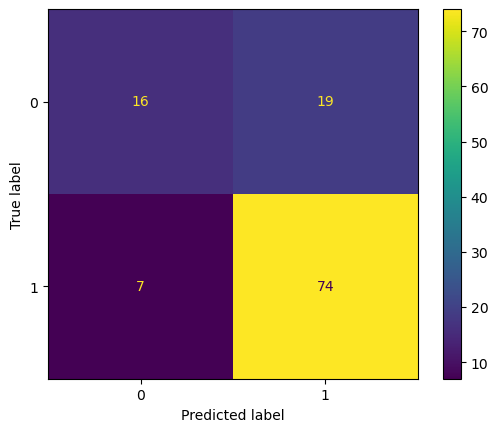

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# 7. Gradient Boost :

In [64]:
print("====================== GRADIANT BOOST CLASSIFIER ================= ")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : Appying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=8)

# Step 3 : Model Creatin :
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

# Step 4 : Predict :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : no rmse in classification

# Step 6 : Accuracy Score :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Test Accuracy:",ac_s(y_test,y_test_pred))

# step 7 : cross vaidation score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross validation Score:",cvs)

print("=============== Confusion matix ===================")
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_test_pred)
print(conf_matrix)

print("=============== Classification report ===============")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("=============== ROC VALUE ==============")
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_test_pred))

====================== GRADIANT BOOST CLASSIFIER ================= 
Train Accuracy: 0.8917748917748918
Test Accuracy: 0.7241379310344828
Cross validation Score: 0.7381954184198223
=============== Confusion matix ===================
[[11 24]
 [ 8 73]]
=============== Classification report ===============
              precision    recall  f1-score   support

           0       0.58      0.31      0.41        35
           1       0.75      0.90      0.82        81

    accuracy                           0.72       116
   macro avg       0.67      0.61      0.61       116
weighted avg       0.70      0.72      0.70       116

=============== ROC VALUE ==============
0.6077601410934744


In [65]:
# Hypertining :
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingClassifier()
param_grid = {"n_estimators":list(range(1,25)),"learning_rate":[0.1,0.2,0.3,0.4,0.5]}
model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'learning_rate': 0.3, 'n_estimators': 5}

In [66]:
model_hp.best_estimator_.feature_importances_

array([9.20371203e-17, 7.22603131e-02, 5.96738023e-02, 1.49758299e-01,
       1.00218784e-01, 5.58840028e-01, 0.00000000e+00, 1.08013098e-02,
       0.00000000e+00, 0.00000000e+00, 4.84474634e-02, 0.00000000e+00])

In [67]:
X_new = pd.DataFrame(model_hp.best_estimator_.feature_importances_,index=X.columns,columns=["imp col"])
X_new = X_new[X_new["imp col"]>0]
X_new = X_new.index.to_list()
X_new

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Married_Yes',
 'Property_Area_Semiurban']

In [68]:
print("====================== FINAL GRADIANT BOOST CLASSIFIER ================= ")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = X[X_new]
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : Appying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=8)

# Step 3 : Model Creatin :
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=4,learning_rate=0.3)
model.fit(X_train,y_train)

# Step 4 : Predict :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : no rmse in classification

# Step 6 : Accuracy Score :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Test Accuracy:",ac_s(y_test,y_test_pred))

# step 7 : cross vaidation score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross validation Score:",cvs)

print("=============== Confusion matix ===================")
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_test_pred)
print(conf_matrix)

print("=============== Classification report ===============")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("=============== ROC VALUE ==============")
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_test_pred))

====================== FINAL GRADIANT BOOST CLASSIFIER ================= 
Train Accuracy: 0.8073593073593074
Test Accuracy: 0.7327586206896551
Cross validation Score: 0.7663160355306218
=============== Confusion matix ===================
[[10 25]
 [ 6 75]]
=============== Classification report ===============
              precision    recall  f1-score   support

           0       0.62      0.29      0.39        35
           1       0.75      0.93      0.83        81

    accuracy                           0.73       116
   macro avg       0.69      0.61      0.61       116
weighted avg       0.71      0.73      0.70       116

=============== ROC VALUE ==============
0.6058201058201058


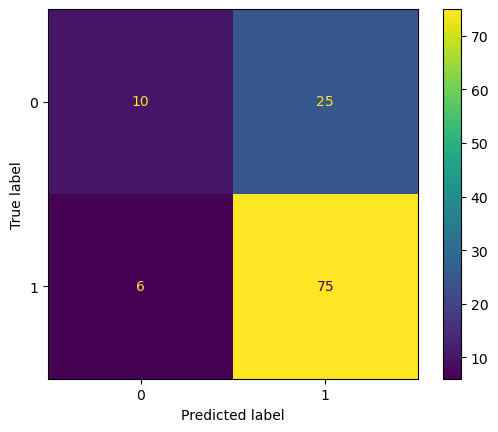

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# 8 . XGB classification :

In [70]:
!pip install xgboost


In [71]:
print("================= XGB classification =================")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : Appying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=8)

# Step 3 : Model Creation :
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

# Step 4 : Prediction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 7 : no rmse in classification

# Step 6 : accuracy score :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Test Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : cross validation score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross validation score:",cvs)

print("=============== CONFUSION MATIX ============")
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_test_pred)
print(conf_matrix)

print("=============== CLASSIFICATION REPORT ============")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("=============== ROC VALUES ============")
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_test_pred))


================= XGB classification =================
Train Accuracy: 1.0
Test Accuracy: 0.6896551724137931
Cross validation score: 0.6928237494156149
=============== CONFUSION MATIX ============
[[11 24]
 [12 69]]
=============== CLASSIFICATION REPORT ============
              precision    recall  f1-score   support

           0       0.48      0.31      0.38        35
           1       0.74      0.85      0.79        81

    accuracy                           0.69       116
   macro avg       0.61      0.58      0.59       116
weighted avg       0.66      0.69      0.67       116

=============== ROC VALUES ============
0.5830687830687831


In [72]:
# Hypertuning :
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier()
param_grid = {"n_estimators":list(range(1,50))}
model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'n_estimators': 3}

In [73]:
model_hp.best_estimator_.feature_importances_

array([0.02704315, 0.02598896, 0.03905394, 0.03107528, 0.02173523,
       0.63441074, 0.04707709, 0.02319364, 0.02964299, 0.0156623 ,
       0.07495052, 0.03016599], dtype=float32)

In [74]:
print("================= FINAL XGB classification =================")

# Step 1 : Dividing the Data and Creating 2D and 1D Datas :
X = pd.get_dummies(df.drop('Loan_Status',axis=1),drop_first=True)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# Step 2 : Appying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=1)

# Step 3 : Model Creation :
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=3)
model.fit(X_train,y_train)

# Step 4 : Prediction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 7 : no rmse in classification

# Step 6 : accuracy score :
from sklearn.metrics import accuracy_score
ac_s = accuracy_score
print("Train Accuracy:",ac_s(y_train,y_train_pred))
print("Test Accuracy:",ac_s(y_test,y_test_pred))

# Step 7 : cross validation score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X_train,y_train,cv=5).mean()
print("Cross validation score:",cvs)

print("=============== CONFUSION MATIX ============")
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_test_pred)
print(conf_matrix)

print("=============== CLASSIFICATION REPORT ============")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("=============== ROC VALUES ============")
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_test_pred))


================= FINAL XGB classification =================
Train Accuracy: 0.8225108225108225
Test Accuracy: 0.7068965517241379
Cross validation score: 0.7358345021037869
=============== CONFUSION MATIX ============
[[ 8 28]
 [ 6 74]]
=============== CLASSIFICATION REPORT ============
              precision    recall  f1-score   support

           0       0.57      0.22      0.32        36
           1       0.73      0.93      0.81        80

    accuracy                           0.71       116
   macro avg       0.65      0.57      0.57       116
weighted avg       0.68      0.71      0.66       116

=============== ROC VALUES ============
0.5736111111111111


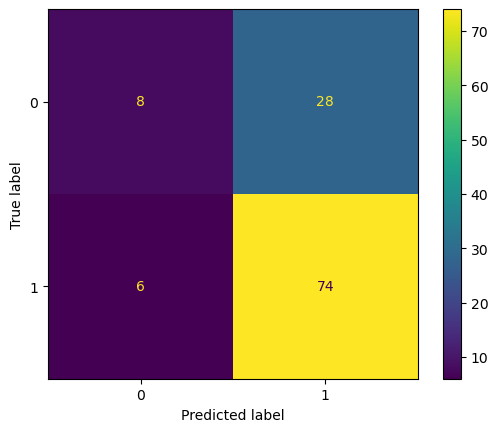

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()